In [37]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = sns.load_dataset('iris')

In [39]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
encoder  = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
df= df[['sepal_length','petal_length','species']]

In [43]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [44]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [46]:
clf = LogisticRegression(multi_class='ovr')

In [47]:
clf.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [48]:
y_pred = clf.predict(x_test)

In [49]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [50]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [51]:
# prediction
query = np.array([[3.4,3.7]])

In [52]:
clf.predict_proba(query)

array([[0.09197318, 0.86576057, 0.04226624]])

In [53]:
clf.predict(query)

array([1])

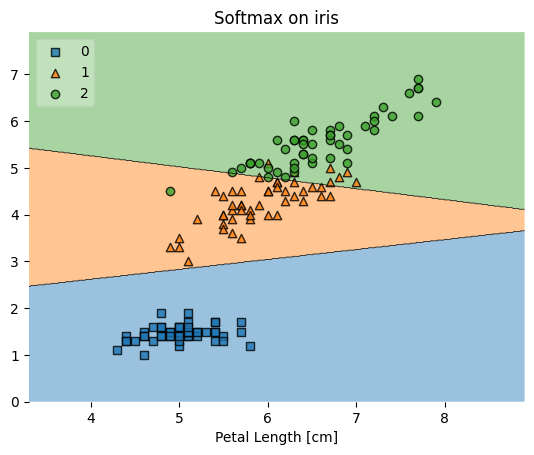

In [54]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values,clf,legend  = 2)

# adding Axes notations
plt.xlabel('Sepal Length [cm]')
plt.xlabel('Petal Length [cm]')
plt.title('Softmax on iris')
plt.show()